In [101]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.

file = "sphere-"
nps = 128
mean = np.reshape(np.fromfile(f'{file}mean-eval-avg-{nps}.bin', dtype=np.float32), (-1,nps,nps,nps))[0]
mean = np.transpose(mean, (0, 1, 2))

var = np.reshape(np.fromfile(f'{file}var-eval-avg-{nps}.bin', dtype=np.float32), (-1,nps,nps,nps))[0]
var = np.transpose(var, (0, 1, 2))

aniso = np.reshape(np.fromfile(f'{file}aniso-{nps}.bin', dtype=np.float32), (-1,nps,nps,nps,6))[0]

XS = np.linspace(-1, 1, nps)
X, Y, Z = np.meshgrid(XS, XS, XS)

print(mean.min(), mean.max())
print(var.min(), var.max())

print(aniso[64,:,:,1].min(), aniso[64,:,:,1].max())


-0.6984174 3.3784063
4.064262e-07 0.0005889853
1.000062 4.999779


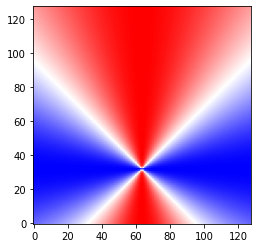

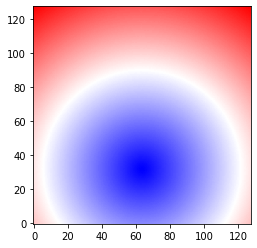

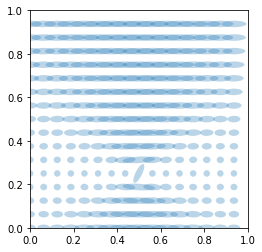

In [104]:
plt.imshow(aniso[64,:,:,1], aspect='equal', origin='lower', cmap="bwr")
plt.show()
plt.imshow(mean[64,:,:], aspect='equal', origin='lower', cmap="bwr")
plt.show()


ells = []
for i in range(0, nps, 8):
    for j in range(0, nps, 8):
        aniso_vals = aniso[64,j,i]

        mat = np.array(
            [[aniso_vals[0], aniso_vals[3]],
             [aniso_vals[3], aniso_vals[1]]]
        )

        evals, evecs = np.linalg.eig(mat)
        angle = np.arctan2(evecs[0,0], evecs[1,0])

        # Using a special case to obtain the eigenvalues of this
        # two-dimensionl dataset.
        ellipse = Ellipse(
            xy=(i/nps,j/nps), 
            width=evals[0]*0.03, 
            height=evals[1]*0.03,
            angle=angle/(np.pi*2) * 360)
        ells.append(ellipse)


fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_alpha(0.3)
    #e.set_facecolor(np.random.rand(3))


In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, axs = plt.subplots(1, 2, figsize=(16,8) )

range = np.maximum(np.abs(mean.min()), np.abs(mean.max()))

mean_im = axs[0].imshow(mean[0], interpolation='none', aspect='auto', origin='lower', vmin=-range, vmax=range, cmap="bwr")
axs[0].set_title("mean")
#fig.colorbar(mean_im)
var_im = axs[1].imshow(var[0], interpolation='none', aspect='auto', origin='lower', vmin=0, vmax=var.max())
axs[1].set_title("variance")
#fig.colorbar(var_im)


def animate_func(i):
    if i % 16 == 0:
        print( '.', end ='' )

    mean_im.set_array(mean[i])
    var_im.set_array(var[i])
    return [mean_im, var_im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = mean.shape[0],
                               interval = 1000 / 10, # in ms
                               )

anim.save(f'{file}test_anim-{nps}.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

print('Done!')

# plt.show()  # Not required, it seems!


<IPython.core.display.Javascript object>

.........Done!


: 